# A Spatiotemporal Analysis of Global Coral Bleaching #

**R Jupyter notebook analysis by Alex Angus (ala2197)**

From 2014 to 2017 the world's coral reefs experienced one of the first recorded mass bleaching events in which greater than 75% of all corals were impacted [[1]](https://www.climate.gov/news-features/understanding-climate/unprecedented-3-years-global-coral-bleaching-2014%E2%80%932017#:~:text=All%20told%2C%20more%20than%2075,were%20impacted%20at%20least%20twice). This event, which affected a seemingly mundane marine invertebrate, has been interpreted by marine biologists as an explicit warning signal that our oceans are in danger. Coral bleaching is natural, and bleaching events are not a new phenomenon, but the frequency and intensity of mass bleaching events has increased in recent decades. Bleaching events in the mid-nineteenth century occurred on average once every 25 to 30 years but are now observed about once every six years. This increased rate is a valid reason to be concerned, because as bleaching events occur more frequently corals have less time to recover which leaves our reefs barren and unhealthy.

![Chasing Coral Image](https://kohtaodivers.com/templates/yootheme/cache/KTD-blog-elokuva-arvostelu-kohtaodivers002-Maldives-Panorama-Image2a-b241d2ea.jpeg)
[Chasing Coral](https://www.chasingcoral.com/)

## What is coral bleaching? ##

Most corals exist in a symbiotic relationship with specific types of photosynthetic algae called *zooxanthellae* [[2]](https://oceanservice.noaa.gov/education/tutorial_corals/coral02_zooxanthellae.html#:~:text=Most%20reef%2Dbuilding%20corals%20contain,compounds%20they%20need%20for%20photosynthesis.). These algae provide corals with biproducts of their photosynthesis, which they in turn use to produce energy and the calcium carbonate that make up their physical structure. When corals experience a stressing event zooxanthella are often expelled, and in the process that white calcium carbonate structure is revealed, hence the term 'coral bleaching'. The mechanism for algae expulsion is not well understood, although it has been hypothesized that corals evolved this behavior to avoid accumulation of damaged cells and encourage nutrient circulation within their tissues [[3]](https://www.sciencedaily.com/releases/2014/12/141229092600.htm). 

![Chasing Coral Timelapse](https://kohtaodivers.fi/images/blogi/this-image-shows-the-same-reef-in-american-samoa-before-during-and-after-a-coral-bleaching-event.jpg)
[Chasing Coral](https://www.chasingcoral.com/)


## Why do we care about coral bleaching? ##

**1. Corals are keystone species**

Coral reefs are often hailed as the tropical rainforests of the ocean because of their immense diversity. By most estimates, coral reefs contain about 25% of all marine life on the planet, including more than 4,000 species of fish [[4]](https://www.epa.gov/coral-reefs/basic-information-about-coral-reefs#:~:text=Coral%20reefs%20are%20among%20the,point%20in%20their%20life%20cycle.). This would simply not be the case if it weren't for corals themselves. Corals provide structures for shelter, feeding, spawning, and nursery grounds for a multitude of species. These species have evolved over 160 million years [[5]](https://www.independent.co.uk/news/science/coral-age-dinosaurs-jurassic-global-warming-climate-change-a8484936.html) to depend on corals, so they are unlikely to be able to adapt to any drastic changes that corals exhibit in any short time frame. To put it simply, if we lose coral, we also lose the 25% of marine species that are intimately reliant coral.

**2. Economics**

Marine species are not the only ones who depend on corals. Humans, too, rely on coral reefs. In addition to the cultural value and natural beauty they provide, we depend on coral reefs for protection from erosion and storms, food, tourism careers, and even for the development of pharmaceuticals [[6]](https://www.noaa.gov/education/resource-collections/marine-life/coral-reef-ecosystems#:~:text=Coral%20reefs%20protect%20coastlines%20from,food%2C%20income%2C%20and%20protection.). It is estimated that more than 500 million people around the world depend directly on coral reefs and tens of billions of US dollars are generated each year by coral reef related industries. 

## Why is coral bleaching? ##

Coral bleaching is caused by a number of documented factors [[7]](https://www.jagranjosh.com/general-knowledge/coral-bleaching-concept-causes-and-factors-responsible-for-coral-bleaching-1440679023-1), and not all corals respond the same to stressing events, but in general it is widely accepted amongst the coral bleaching literature that the largest cause of mass coral bleaching is prolonged exposure to uncharacteristically warm oceans. Thus, in this analysis we will follow the general outline specified in [[8]](https://www.nature.com/articles/s41467-019-09238-2) and focus mainly on features relating to water temperatures in an attempt to uncover the underlying trends resulting in coral bleaching events.

# Analysis #

### Import R libraries ###

In [1]:
suppressMessages(library(rgdal))          # Provides bindings to Geospatial Data Abstraction Library (GDAL) and access to projection/transformation operations from the PROJ library.
suppressMessages(library(plotrix))        # plotting, labeling, axis and color scaling functions
suppressMessages(library(GISTools))       # utilities for handling and visualising geographical data 
suppressMessages(library(dplyr))          # dataframe manipulation
suppressMessages(library(viridis))        # color palettes
suppressMessages(library(boot))           # bootstrapping library
suppressMessages(library(IRdisplay))      # display images inline
suppressMessages(library(corrplot))       # correlation matrix package
suppressMessages(library(jtools))         # plotting regression coefficients

## Visualize Dataset ##

In [2]:
home_dir <- getwd()    # get home directory
dir.create(file.path(home_dir, 'figures'), showWarnings=FALSE) # create figures directory

reef_data <- read.csv('reef_data_parameters.csv', header=TRUE, sep=',')  # read csv dataset
head(reef_data)  # view head of datast

,Reef.ID,Reef.Name,Ocean,Country,State.Province.Island,City.Town,Year,Date,Depth,Organism.Code,⋯,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Region,Diversity,rate_of_SST_change,Longitude.Degrees,Latitude.Degrees
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,103.10.28.1E.10.50.46.1N,Koh Mano (Minor),Indian,Cambodia,Koh Kong,,2003,19-Feb-03,4.5,Bleaching (% of population),⋯,1,0,1.690,14.560,0.590,ERG050,417,0.02055555,103.1745,10.84614
2,103.11.35.5E.10.49.32N,Koh Mano (south),Indian,Cambodia,Koh Kong,,2003,28-Feb-03,4.5,Bleaching (% of population),⋯,1,0,1.800,17.010,0.520,ERG050,417,0.02055555,103.1932,10.82556
3,103.11.79.5E.10.48.2.7N,Koh Ta Team,Indian,Cambodia,Koh Kong,,2003,24-Feb-03,5.0,Bleaching (% of population),⋯,1,0,1.620,13.760,0.520,ERG050,417,0.02055555,103.1966,10.80075
4,103.4.16.8E.11.3.36.2N,Koh Krosa Krao,Indian,Cambodia,Koh Kong,,2003,25-Feb-03,6.0,Bleaching (% of population),⋯,1,0,1.450,10.940,0.410,ERG050,417,0.01906566,103.0713,11.06006
5,103.4.63.9E.11.3.58.3N,Koh Krosa Kandal,Indian,Cambodia,Koh Kong,,2003,27-Feb-03,3.2,Bleaching (% of population),⋯,1,0,1.692,15.038,0.488,ERG050,417,0.01906566,103.0773,11.06619
6,103.5.55.5E.10.53.48.5N,Koh Smach,Indian,Cambodia,Koh Kong,,2003,18-Feb-03,3.0,Bleaching (% of population),⋯,0,0,1.030,9.860,0.260,ERG050,417,0.02055555,103.0987,10.89681


This dataset is composed of reef observations made by a mixture of scientists and certified amateurs from around the globe using a standardized transect protocol. It was compiled by https://www.reefcheck.org/, has been certified numerous times for quality and uniformity [[9]](https://pubmed.ncbi.nlm.nih.gov/28162251/) and has been used in multiple published analyses.

The recorded observations of reefs around the world from 1998 to 2017 are expressed as a percent bleaching of individual sites. Additionally, for sites that are considered to exhibit 'site-wide' bleaching, a count of the number of coral colonies showing bleaching is included in the columns 'S1' through 'S4'. Other features such as Sea Surface Temperature (SST), reef depth, and geographical coordinates are also recorded for each entry. These features are then used to calculate derived features such as SST Anomalies (SSTA), SSTA Degree Heating Weeks (SSTA_DHW), and Thermal Stress Anomalies (TSA). Below is the calculation procedure for some of these features.

**Climatological SST (ClimSST) = Harmonic Average of Weekly SST**

**Sea Surface Temperature Anomaly (SSTA) = Weekly SST - Weekly Climatological SST**

**Rate of SST change (rate_of_SST_change) = annual rate of SST change**

**Degree Heating Week (DHW) = 1°C of SST above the long term average for a given area**

**Thermal Stress Anomaly (TSA) = Weekly SST - Maximum of weekly ClimSST**

**SSTA Degree Heating Weeks (SSTA_DHW) = Sum of Previous 12 Weeks when SSTA >= 1°C**

## Visualize Global Coral Bleaching - Spatial Analysis ##

**Import shapefile for plotting geospatial data.**

We will use a shapefile defining the world's borders to plot our geospatial coral bleaching data. The specific shapefile used in this analysis can be found here at koordinates.com [[10]](https://koordinates.com/layer/7354-tm-world-borders-03/).

In [3]:
world_borders_shp_path <- file.path(home_dir, 'shapefiles', 'tm-world-borders-03.shp')  # define globe shapefile path
world_shape <- readOGR(world_borders_shp_path)  # read shapefile

OGR data source with driver: ESRI Shapefile 
Source: "/Users/alexangus/Env Modelling/FinalProject/shapefiles/tm-world-borders-03.shp", layer: "tm-world-borders-03"
with 246 features
It has 11 fields
Integer64 fields read as strings:  POP2005 


In [4]:
# Prepare dataframe for globe plotting

reef_data$Latitude <- reef_data$Latitude.Degrees    # shorten column names
reef_data$Longitude <- reef_data$Longitude.Degrees

reef_data$bleach_av[rowSums(reef_data[c('S1','S2','S3','S4')], na.rm=TRUE) >= 1] <- 1 # sum entries
reef_data$bleach_av <- rowSums(reef_data[c('S1', 'S2', 'S3', 'S4')], na.rm=TRUE) / rowSums(!is.na(reef_data[c('S1', 'S2', 'S3', 'S4')]))   # calculate average bleaching
reef_data$bleach_av[reef_data$bleach_av < 1] <- 0 # set all bleaching observations less than 1% to zero


In [5]:
# define image display function
display_figure <- function(filename, w=NULL, h=NULL){
    file_path <- file.path(home_dir, 'figures', filename)
    display_png(file=file_path, width=w, height=h)
}

pdf 
  2

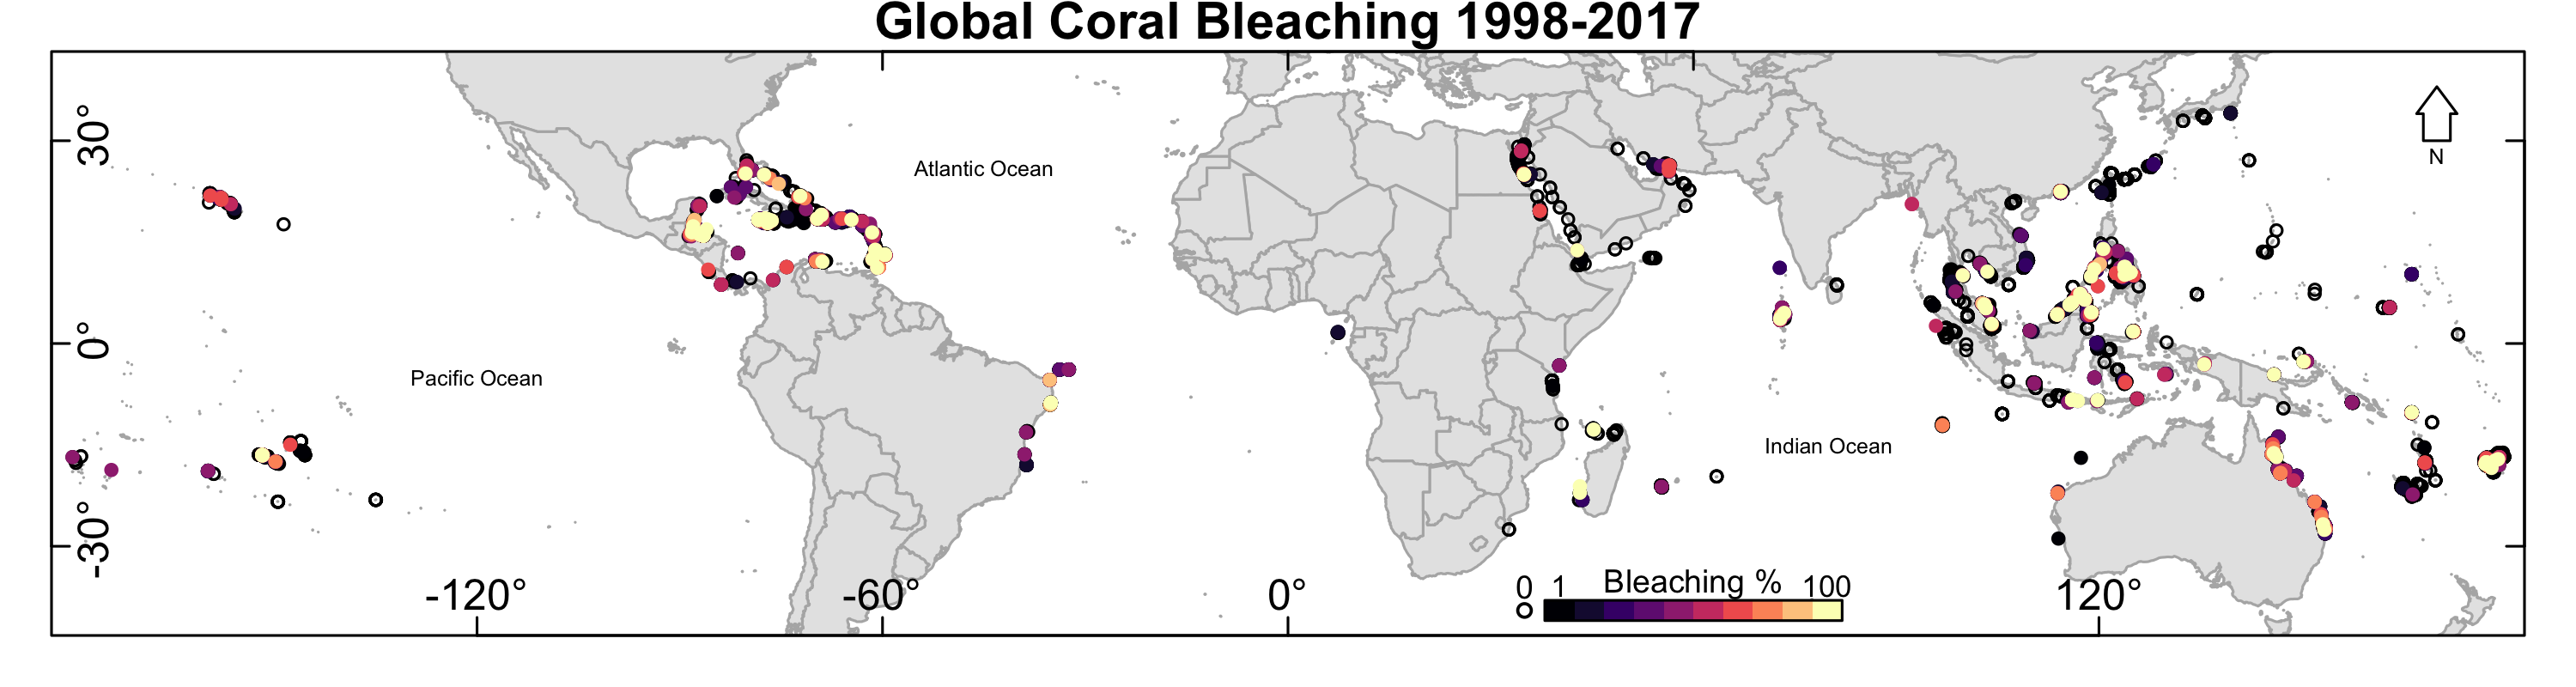

In [6]:
world_coral_bleaching_filename <- 'world_coral_bleaching.png'   # define figure filename

png(file.path('figures', world_coral_bleaching_filename), height=800, width=3000, res=300)

par(mgp=c(0.5, 0.6, 0), mar=c(1, 1, 1, 1))     # set plot parameters

plot(world_shape, ylim=c(-40, 40),xlim=c(-15, 15), col='grey90', border='grey70')    # plot tropical regions of globe (near equator)

axis(1, at=c(-120, -60, 0, 120), lab=c('-120°', '-60°', '0°', '120°'), las=1, tcl=0.35, mgp=c(-1, -1.3, 0))    # add lat/long axes
axis(2, at=c(30, 0, -30), labels=c('30°', '0°', '-30°'), las=3, tcl=0.35, mgp=c(-2, -1.3, 0), hadj=.4)
axis(3, at=c(-60, 0, 60), lab=c('', '', ''), las=1, tcl=0.35, mgp=c(-1, -1.3, 0))
axis(4, at=c(30, 0, -30), labels=c('', '', ''), las=2, tcl=0.35, mgp=c(-1, -0.6, 0), hadj=0)
box()     # add bounding box

# plot coral bleaching percentages at geographic locations

point_size <- 0.6    # set point size variable
palette <- viridis(10, option='magma')   # set color palette variable

zero_bleach_points <- reef_data[reef_data$bleach_av == 0, c('Longitude','Latitude')]     # get zero bleaching points

points(zero_bleach_points, cex=point_size)    # plot zero_bleach_points

bleaching_degree <- subset(reef_data, bleach_av > 0)    # get nonzero bleaching points
bleaching_degree <- bleaching_degree[with(bleaching_degree, order(bleaching_degree$bleach_av)),]
nonzero_bleach_points <- bleaching_degree[c('Longitude','Latitude')]   

points(nonzero_bleach_points, cex=point_size, pch=19, col=palette[bleaching_degree$bleach_av])   # plot nonzero bleaching points with color gradient

text(80, -15,'Indian Ocean', cex=0.5)       # add ocean labels and north arrow
text(-120, -5,'Pacific Ocean', cex=0.5)
text(-45, 26,'Atlantic Ocean', cex=0.5)
north.arrow(x=(170), y=30, len=(2), lab="N", cex=.5)

plotrix::color.legend(38, -41, 82, -38, legend=c(1,100), rect.col=palette, cex=0.7)   # add legend and title
points(35, -39.5, lwd=1.2, cex=point_size+0.1)
text(35, -36, '0', cex=0.75)
text(60, -35.5, "Bleaching %", cex=0.75)
title("Global Coral Bleaching 1998-2017", line=0.25)
dev.off()

display_figure(world_coral_bleaching_filename)    # display image inline

The plot above shows the global distribution of coral bleaching from 1998 to 2017. Empty circles indicate no bleaching, while colored circles indicate bleaching from 1% to 100% represented by the dark to light gradient. It's clear from this plot, made from observations of 3351 sites in 81 countries, that coral bleaching is occurring globally. However, it is not clear how corals from different regions of the world respond to different ocean conditions, and some areas like Japan, the Red Sea, and parts of the Caribbean even show little to no bleaching.

Now we will use the normalized dataset to investigate the severity of bleaching as a function of latitude and longitude.

pdf 
  2

pdf 
  2

pdf 
  2

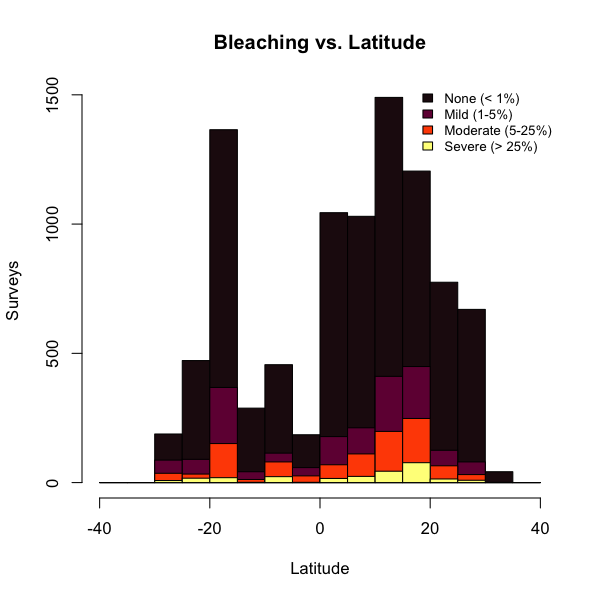

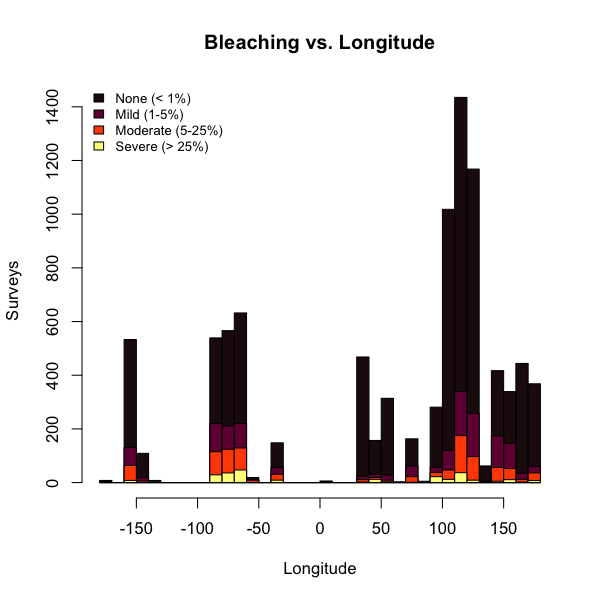

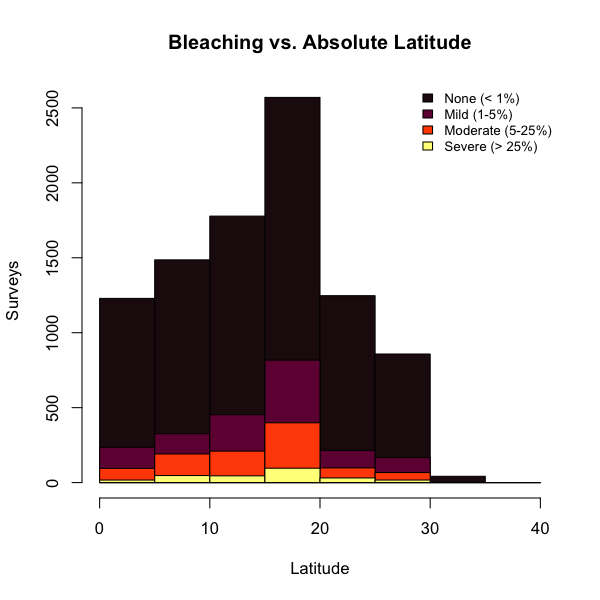

In [7]:
# import normalized data
reef_data_normalized <- read.csv('reef_data_parameters_normalized.csv', header=TRUE, sep=',')

# define bleaching categories
mild <- 1
moderate <- 5
severe <- 25

# assign colors to bleaching categories
zero_bleach_color <- "#220b11"
mild_bleach_color <- "#710d41"
moderate_bleach_color <- "#ff4e01"
severe_bleach_color <- "#feff89"

# define severity array
severity <- array(data=NA, dim=length(reef_data_normalized$Average_bleaching))

# for each entry determine bleaching category
for(i in 1:length(reef_data_normalized$Average_bleaching)){
    # if less that 1% bleaching
    if(reef_data_normalized$Average_bleaching[i] < 1){ 
        severity[i] = 0
    }
    # if mild bleaching
    if((reef_data_normalized$Average_bleaching[i] >= mild) & (reef_data_normalized$Average_bleaching[i] < moderate)){
        severity[i] = 1
    }
    # if moderate bleaching
    if((reef_data_normalized$Average_bleaching[i] >= moderate) & (reef_data_normalized$Average_bleaching[i] < severe)){
        severity[i] = 2
    }
    # if severe bleaching
    if(reef_data_normalized$Average_bleaching[i] >= severe){
        severity[i] = 3
    }
}

reef_data_normalized_none <- subset(reef_data_normalized)  # no severities
reef_data_normalized_mild <- subset(reef_data_normalized, severity > 0) # mild severities
reef_data_normalized_moderate <- subset(reef_data_normalized, severity > (1)) # moderate severities
reef_data_normalized_severe <- subset(reef_data_normalized, severity > (2))   # servere severities

num_studies <- length(severity)   # get number of entries

lat_bins <- seq(-40, 40, 5)                       # define latitude bins

# generate latitude severities histograms
lat0 <- hist(na.omit(reef_data_normalized_none$Latitude.Degrees), breaks=lat_bins, plot=FALSE)
lat1 <- hist(na.omit(reef_data_normalized_mild$Latitude.Degrees), breaks=lat_bins, plot=FALSE)
lat2 <- hist(na.omit(reef_data_normalized_moderate$Latitude.Degrees), breaks=lat_bins, plot=FALSE)
lat3 <- hist(na.omit(reef_data_normalized_severe$Latitude.Degrees), breaks=lat_bins, plot=FALSE)

long_bins <- seq(-180, 180, 10)       # define longitude bins

# generate longitude severities histograms
lon0 <- hist(na.omit(reef_data_normalized_none$Longitude.Degrees), breaks=long_bins, plot=FALSE)
lon1 <- hist(na.omit(reef_data_normalized_mild$Longitude.Degrees), breaks=long_bins, plot=FALSE)
lon2 <- hist(na.omit(reef_data_normalized_moderate$Longitude.Degrees), breaks=long_bins, plot=FALSE)
lon3 <- hist(na.omit(reef_data_normalized_severe$Longitude.Degrees), breaks=long_bins, plot=FALSE)

abs_lat_bins <- seq(0, 40, 5)     # define absolute latitude bins

# generate absolute latitude severities histograms
lat_abs_0 <- hist(na.omit(abs(reef_data_normalized_none$Latitude.Degrees)), breaks=abs_lat_bins, plot=FALSE)
lat_abs_1 <- hist(na.omit(abs(reef_data_normalized_mild$Latitude.Degrees)), breaks=abs_lat_bins, plot=FALSE)
lat_abs_2 <- hist(na.omit(abs(reef_data_normalized_moderate$Latitude.Degrees)), breaks=abs_lat_bins, plot=FALSE)
lat_abs_3 <- hist(na.omit(abs(reef_data_normalized_severe$Latitude.Degrees)), breaks=abs_lat_bins, plot=FALSE)

# define color legend vector
bleach_color_legend <- c(zero_bleach_color, mild_bleach_color, moderate_bleach_color, severe_bleach_color)

# define figure filenames
latitude_severity_filename <- "severity_lat.png"
longitude_severity_filename <- "severity_long.png"
abs_latitude_severity <- "abs_severity_lat.png"

# define resolutions and dimensions
resolution <- 100
width <- 600
height <- 600

# generate latitude severity figure
png(file.path("figures", latitude_severity_filename), res=resolution, width=width, height=height)
plot(lat0, xlab="Latitude", ylab="Surveys", main="Bleaching vs. Latitude", col=zero_bleach_color)
plot(lat1, col=mild_bleach_color, add=T)
plot(lat2, col=moderate_bleach_color, add=T)
plot(lat3, col=severe_bleach_color, add=T)
legend("topright", c("None (< 1%)", "Mild (1-5%)", "Moderate (5-25%)", "Severe (> 25%)"), fill=bleach_color_legend, bty="n", cex=0.8)
dev.off()

# generate longitude severity figure
png(file.path("figures", longitude_severity_filename), res=resolution, width=width, height=height)
plot(lon0, xlab="Longitude", ylab="Surveys", main="Bleaching vs. Longitude", col=zero_bleach_color)
plot(lon1, col=mild_bleach_color, add=T)
plot(lon2, col=moderate_bleach_color, add=T)
plot(lon3, col=severe_bleach_color, add=T)
legend("topleft", c("None (< 1%)", "Mild (1-5%)", "Moderate (5-25%)", "Severe (> 25%)"), fill=bleach_color_legend, bty="n", cex=0.8)
dev.off()

# generate absolute latitude severity figure
png(file.path("figures", abs_latitude_severity), res=resolution, width=width, height=height)
plot(lat_abs_0, xlab="Latitude", ylab="Surveys", main="Bleaching vs. Absolute Latitude", col=zero_bleach_color)
plot(lat_abs_1, col=mild_bleach_color, add=T)
plot(lat_abs_2, col=moderate_bleach_color, add=T)
plot(lat_abs_3, col=severe_bleach_color, add=T)
legend("topright", c("None (< 1%)", "Mild (1-5%)", "Moderate (5-25%)", "Severe (> 25%)"), fill=bleach_color_legend, bty="n", cex=0.8)
dev.off()

# display images inline
display_figure(latitude_severity_filename)    
display_figure(longitude_severity_filename)    
display_figure(abs_latitude_severity)    

The above plots show the relationship of bleaching severity to latitude, longitude, and absolute latitude. Bleaching severity is categorized into four categories: None, Mild, Moderate, and Severe which correspond to < 1%, between 1 and 5%, between 5 and 25%, and greater than 25% bleaching, respectively. Immediately, it should be noted that there is little to no relationship between number of surveys and severity of coral bleaching. This is evident in the proportionality of surveys to each category of bleaching severity. 

The longitude plot shows somewhat of a random distribution of bleaching severities, indicating that there is no obvious relationship between coral bleaching and longitude. 

The latitude plot shows a two-peak distribution in which coral bleaching severity is densest between -15 to -20 degrees and 15 to 20 degrees from the equator. The absolute latitude plot confirms our hypothesis that coral bleaching is most severe at mid-latitude sites. It is not immediately evident why this is the case, as (shown in the next section) the temperature of waters closer to the equator exhibit higher average SST and TSAs. The reason for this pattern is discussed in the coral bleaching literature, and it is proposed [[11]](https://www.nature.com/articles/s41467-019-09238-2) that equatorial corals are observed to bleach less severely relative to 15-20 degrees off the equator because of the following mechanisms.

**1. Coral species composition differs by geographic location.**

Equatorial coral species are already adapted to warm water temperatures, thus warmer temperatures are less of a problem for them than for other corals.

**2. There is a higher diversity of species at lower latitudes meaning some species are more resilient to warmer temperatures.**

More genotypic diversity includes genes that are less susceptible to thermal stress.

**3. Corals experiencing warmer temperatures have adapted, or more susceptible species have already bleached.**



It is likely that all three of these mechanisms are influencing the severity of coral bleaching to some degree.

### Visualize other features as a function of Latitude ###

Specifically we will visualize SST, TSA, SST Standard Deviation, and SSTA frequency. These variables respond directly to latitude, so we will further investigate these relationships with boxplots.

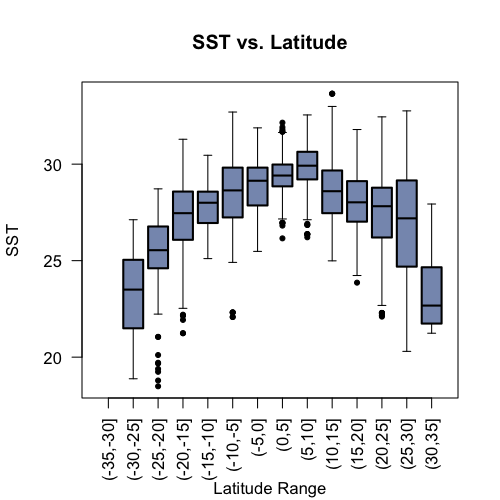

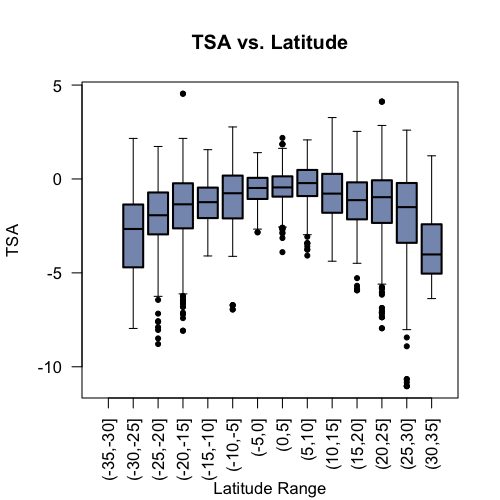

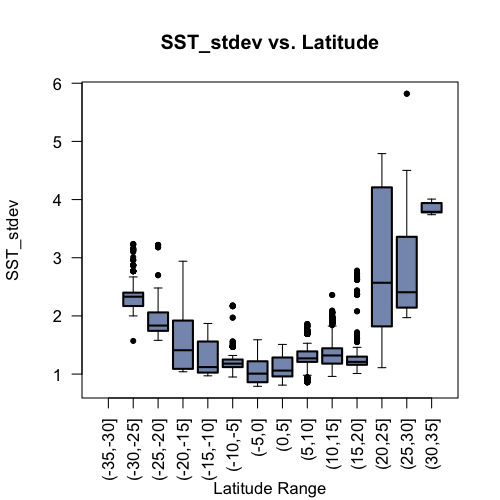

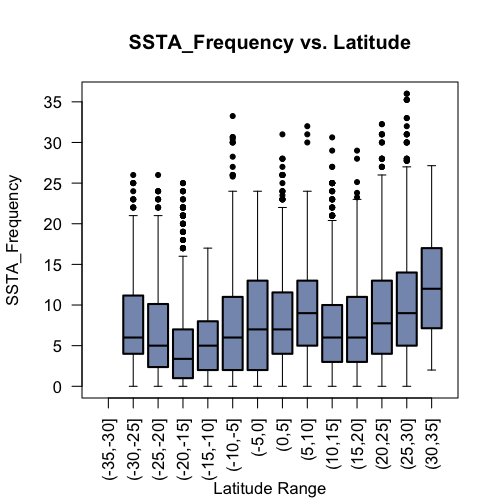

In [8]:
bins <- seq(-35, 35, by=5)   # generate bins

# group data by latitude bins
reef_data_normalized$group <- reef_data_normalized$Latitude.Degrees  
reef_data_normalized$group <- cut(reef_data_normalized$group, breaks=bins, include.lowest=FALSE, right=TRUE, dig.lab=2, orderd_result=TRUE)

# define boxplotting function
make_boxplot <- function(y, variable){
    filename <- paste(variable, "_boxplot.png", sep='')  # define figure filename
    png(file.path(home_dir, 'figures', filename), res=100, width=500, height=500)
    boxplot(y~group, data=reef_data_normalized, las=2, xlab="", ylab=variable, col="#8798BB",   # generate boxplot
            outline=TRUE, pch = 20, lty=1.4, staplewex=0.4, boxwex=0.8, boxlwd=2, medlwd=2,
            main=paste(variable, "vs. Latitude"))
    mtext(side=1, text="Latitude Range", line=4)
    dev.off()
    return(filename)
}

# display figures
display_figure(make_boxplot(reef_data_normalized$Temperature_Kelvin-273.15, "SST"))
display_figure(make_boxplot(reef_data_normalized$TSA, "TSA"))
display_figure(make_boxplot(reef_data_normalized$Temperature_Kelvin_Standard_Deviation, "SST_stdev"))
display_figure(make_boxplot(reef_data_normalized$SSTA_Frequency, "SSTA_Frequency"))

For each of the above boxplots we analyze a feature as a function of Latitude. The center line of each box is the median value, the upper and lower bounds are the 25% and 75% interquartile ranges, the stems indicate the 95% range, and circles indicate data outside the 95% range.

The SST plot reflects the higher average temperature of oceans near the equator. As we move towards the poles, the average SST decreases. The TSA plot follows the same general trend, to a less extreme effect, as the SST plot. This makes sense, as TSA is derived directly from average SST (Weekly SST - Weekly Climatological SST). The SST standard deviation plot reflects the seasonality of oceans. Again, as we move towards the poles, we see a higher degree of variability in SST due to the oscillatory nature of rotation of the earth on its tilted axis. In the SSTA Frequency plot we see that there are significant decreases of SSTA Frequency around the 15 to 20 degree latitudes. This reflects the relationship of high severity of bleaching events between 15 and 20 degrees from the equator discussed in the previous section, and it indicates that areas exhibiting low SSTA frequency are increasingly correlated with severe bleaching events. Conversely, it follows that areas exhibiting high SSTA frequency are less likely to see severe coral bleaching events.

## Time Series Analysis ##

We will now examine coral bleaching and its relationship to time. First, we'll do a simple linear regression of bleaching presence as a function of year. This can be interpreted as the probability that a given coral colony will bleach at a specific time.

pdf 
  2

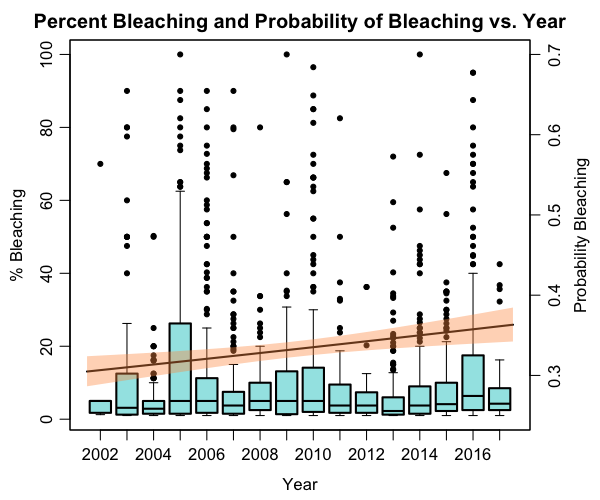

In [9]:
bleach_data <- read.csv(file="reef_data_parameters.csv", header=TRUE, sep=",")

bleach_data <- subset(bleach_data, Organism.Code=="Bleaching (% of population)")

# calculate bleaching metrics for regression
bleach_data$bleach_presence <- 0 # set bleaching presence to zero
bleach_data$bleach_presence[rowSums(reef_data[c('S1', 'S2', 'S3', 'S4')], na.rm=TRUE) >= 1] <- 1  # sum entries
bleach_data$bleach_av <- rowSums(bleach_data[c('S1', 'S2', 'S3', 'S4')], na.rm=TRUE) / rowSums(!is.na(bleach_data[c('S1', 'S2', 'S3', 'S4')]))  # calculate average bleaching
bleach_data$bleach_av[bleach_data$bleach_av < 1] <- 0  # set entries less than 1 to zero
bleach_data$average_bleaching <- bleach_data$bleach_av # rename

# get points where bleaching is present (before 2002 there are significantly less data entries)
bleaching_present <- subset(bleach_data, average_bleaching > 0) 
bleaching_present_2002 <- subset(bleaching_present, Year > 2001) 

data_2002 <- data.frame(Year=as.factor(unique(bleaching_present_2002$Year)))  # get unique bleaching events after 2002

alldata_2002 <- subset(bleach_data, Year > 2001) # get all data after 2002
alldata_2002$Year.num <- as.numeric(as.factor(alldata_2002$Year)) # convert years into numerics
linear_model <- glm(bleach_presence ~ Year.num, family='binomial', data=alldata_2002)  # fit generalized linear model
data_2002 <- data.frame(Year.num=unique(alldata_2002$Year.num), Year=unique(alldata_2002$Year))  # convert data after 2002 to dataframe
data_2002 <- arrange(data_2002, Year) # convert to arrange
prediction <- predict(linear_model, newdata=data_2002[c('Year.num')], se.fit=TRUE) # make predictions with new data

regression_filename <- 'linear_regression.png'   # define figure filename

png(file.path(home_dir, 'figures', regression_filename), height=500 ,width=600 ,res=100)

par(mfrow=c(1, 1), mgp=c(2.2, 0.7, 0), mar=c(3.5, 3.5, 2, 3.5))  # set figure parameters

plot(average_bleaching ~ as.factor(Year), data=bleaching_present_2002, outline=TRUE, pch = 20,  # make boxplot of bleaching data
     lty=1.4, staplewex=0.4, boxwex=0.8, boxlwd=2, medlwd=2, col='#a2e5e5', xlab='Year', 
     ylab='% Bleaching')

par(new=TRUE)  # new layer

plot(data_2002$Year.num, inv.logit(prediction$fit), type='l', col='black', xaxt='n', yaxt='n', # plot prediction line
     lwd=2, ylab='', xlab='', ylim=c(0.25, 0.7))

polygon(c(data_2002$Year.num, rev(data_2002$Year.num)),           # plot 95% confidence interval
        c(inv.logit(prediction$fit + 1.96 * prediction$se.fit),
          rev(inv.logit(prediction$fit - 1.96 * prediction$se.fit))),
        border=FALSE, col=rgb(255, 154, 81, 100, max=255))
axis(4)   # add right axis

mtext('Probability Bleaching',side=4,line=2)
title("Percent Bleaching and Probability of Bleaching vs. Year")

dev.off()

display_figure(regression_filename)

Above we have created a boxplot of the percent of coral colonies showing bleaching for a given year. Overlayed on this boxplot is the linear regression between bleaching presence and time. The left axis measures the percentage of bleached corals and the right axis measures the probability that a given coral colony will show bleaching for each year. The 95% confidence interval of this regression is highlighted in red. The trend indicates that with increasing years there is an increasing probability that corals will exhibit bleaching. Also, worth noting is the cyclic pattern of percent of corals showing bleaching. As discussed in the introduction, this cycle has a period of about six years, which deviates significantly from bleaching cycles observed in the mid twentieth century with periods of about 25 to 30 years. It is well documented [[12]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5798774/#:~:text=El%20Ni%C3%B1o%2FLa%20Ni%C3%B1a%20warming,and%20significant%20decreases%20coral%20cover.&text=As%20expected%2C%20coral%20cover%20loss,to%20decreases%20in%20coral%20cover.) that this cycle coincides with El Niño years where ocean temperatures are predictably warmer.

## Are corals bleaching at consistent temperatures over time? ##

We will now determine if corals are bleaching at consistent temperatures over time. To do this we will split our dataset into two groups, pre 2007 bleaching and post 2007 bleaching, and plot the probability density of the bleaching temperature for the two groups.

pdf 
  2

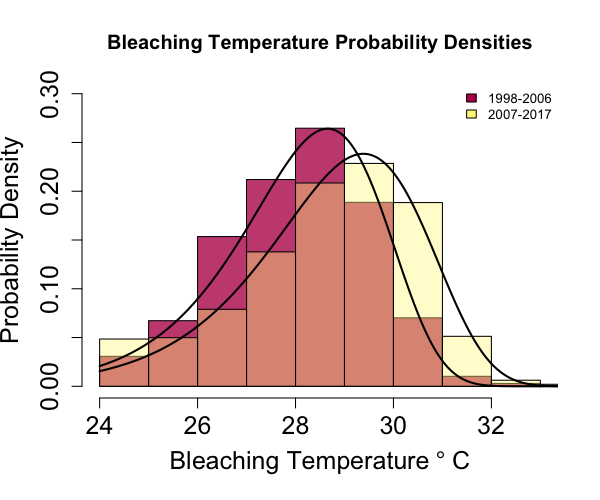

In [10]:
reef_data <- read.csv(file=file.path(home_dir, "reef_data_parameters.csv"), header=TRUE, sep=",")   # read dataset

reef_data$Temp <- reef_data$Temperature_Kelvin - 273.15  # convert from Kelvin to Celcius
reef_data <- reef_data[!is.na(reef_data$Temp),]   # discard NAs
reef_data$Average_bleaching[reef_data$Average_bleaching < 1] <- 0  # set % bleaching < 1 to 0
bleaching_present <- subset(reef_data, Average_bleaching > 0) # select subset of bleaching reefs

# separate before and after 2007
pre2007 <- subset(bleaching_present, Year < 2007 & Temp > 24, select=c(Temp, Average_bleaching, Year)) 
post2007 <- subset(bleaching_present, Year >= 2007 & Temp > 24, select=c(Temp, Average_bleaching, Year)) 

pd_filename <- 'bleaching_probabililty_density.png'

png(file=file.path(home_dir, 'figures', pd_filename), height=500, width=600, res=100)
# plot pre-2007 histogram
hist(pre2007$Temp, col=rgb(184, 0, 86, 200, max=255), main="", xlab=expression("Bleaching Temperature"~degree~C), 
     ylab="Probability Density", freq=F, ylim=c(0, 0.3), cex.lab=1.5, cex.axis=1.5)
# plot post-2007 histogram
hist(post2007$Temp, freq=F, col=rgb(255, 246, 135, 100, max=255), main="", add=T)

# fit pre-2007 data to Weibull probability distribution and plot fit
pre2007_probability_density <- fitdistr(pre2007$Temp, 'weibull')
post2007_probability_density <- fitdistr(post2007$Temp,'weibull')

temps <- seq(24, 34, 0.01) 

pre2007_probability_density_curve <- dweibull(temps, pre2007_probability_density$estimate['shape'], pre2007_probability_density$estimate['scale'])
post2007_probability_density_curve <- dweibull(temps, post2007_probability_density$estimate['shape'], post2007_probability_density$estimate['scale'])

lines(temps, pre2007_probability_density_curve, col='black', lwd=2)
lines(temps, post2007_probability_density_curve, col='black', lwd=2)

legend("topright", c("1998-2006", "2007-2017"), fill=c(rgb(184, 0, 86, max=255), rgb(255, 246, 135, max=255)), bty="n", cex=0.8)
title("Bleaching Temperature Probability Densities")

dev.off()

display_figure(pd_filename)

In the above plot we show the probability density of bleaching temperatures from 1998 to 2006 (red) and from 2007 to 2017 (beige). The curves plotted over these distributions are Weibull fits described by the distribution:

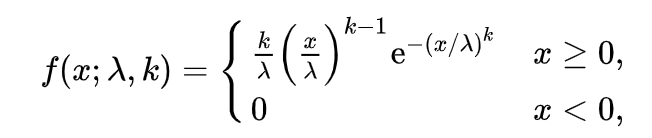 [[13]](https://en.wikipedia.org/wiki/Weibull_distribution)

where $k$ is the shape parameter and $\lambda$ is the scale parameter.

From this plot we can see that the expected bleaching temperature difference of the two groups is on the order of one-degree Celcius. This implies that, on average, corals are bleaching at higher temperatures than they were in the past. There are two possible explanations for this difference.

**1. Corals more susceptible to thermal stress have already been bleached by past bleaching events, so bleaching we are seeing today is that of less susceptible corals under more extreme thermal stress.**

**2. Corals are adapting to warmer climates; thus, they are bleaching at higher temperatures.**

Both explanations need more investigation in future analyses to produce a more robust understanding of this phenomenon.

## Multiple Linear Regression Analysis ##

Now we perform a multiple linear regression to predict bleaching behaviors using multiple features.

### Prepare Data for MLR ###

Before we perform the regression, we will normalize our feature values for consistency and check the correlations between them to avoid any codependences.

In [11]:
regression_vars <- c('Latitude.Degrees',    # variables we wish to consider in MCMC analysis
                     'Year',
                     'Depth',
                     'ClimSST',
                     'Temperature_Kelvin',
                     'Temperature_Maximum',
                     'Temperature_Kelvin_Standard_Deviation',
                     'SSTA',
                     'SSTA_Minimum',
                     'SSTA_Maximum',
                     'SSTA_DHW',
                     'SSTA_Frequency',
                     'SSTA_Frequency_Standard_Deviation',
                     'TSA_Frequency',
                     'TSA_Frequency_Standard_Deviation',
                     'TSA_DHW_Standard_Deviation',
                     'rate_of_SST_change',
                     'Average_bleaching')

reg_data <- reef_data[regression_vars]                     # remove variables not considered
reg_data$absolute_lat <- abs(reg_data$Latitude.Degrees)    # calculate absolute latitude
reg_data <- subset(reg_data, select=-c(Latitude.Degrees))  # remove relative latitude

# define function for normalizing mcmc data (mean = 0, std = 1)
normalize <- function(feature){
    return((feature - mean(na.omit(feature))) / sd(na.omit(feature)))
}

# normalize mcmc_data
reg_norm <- reg_data; for(index in 1:ncol(reg_data)) reg_norm[,index] <- normalize(reg_data[,index])

head(reg_norm)    # visualize normalized regression data

,Year,Depth,ClimSST,Temperature_Kelvin,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,SSTA,SSTA_Minimum,SSTA_Maximum,SSTA_DHW,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_DHW_Standard_Deviation,rate_of_SST_change,Average_bleaching,absolute_lat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.503763,-0.5561030,0.5897063,0.1982784,1.5870849,-0.5369103,-0.7211334,0.17183914,0.50751117,-0.07380324,-0.9578398,1.4447999,-0.7475792,0.17986963,0.19564022,0.5478305,-0.274754,-0.4686674
2,-1.503763,-0.5561030,0.6052617,0.8827184,1.7153124,-0.5897029,0.7471622,-0.14491247,0.38633276,-0.40752939,-1.1274251,0.9825783,-0.7475792,0.16694677,0.29703624,0.5478305,-0.274754,-0.4714343
3,-1.503763,-0.4115151,0.5971458,0.1452584,1.3036347,-0.4973159,-0.9996033,0.37340834,0.11368133,-0.35747046,-0.7882544,1.9070214,-0.7475792,-0.14320193,0.13111548,0.5478305,-0.274754,-0.4747687
4,-1.503763,-0.1223393,0.5863246,0.3235984,1.3643740,-0.6292973,-0.4300059,-0.02973007,0.01522387,1.47246126,-0.2794984,0.2539918,-0.7475792,-0.02689617,-0.02558745,0.4197802,-0.274754,-0.4399121
5,-1.503763,-0.9320316,-2.1683426,0.9212784,1.1835058,-0.6081803,0.8484239,0.23806902,-0.12110184,1.00301981,-0.4151667,0.6441382,-0.7475792,0.36854343,0.19748379,0.4197802,-0.274754,-0.4390869
6,-1.503763,-0.9898668,0.5606243,0.5886984,0.4937769,-0.6424954,0.7091890,-0.01533227,-0.61338913,0.33501130,-0.7882544,0.6378707,-0.7475792,-0.54381067,-0.41273588,0.5478305,-0.274754,-0.4618567


pdf 
  2

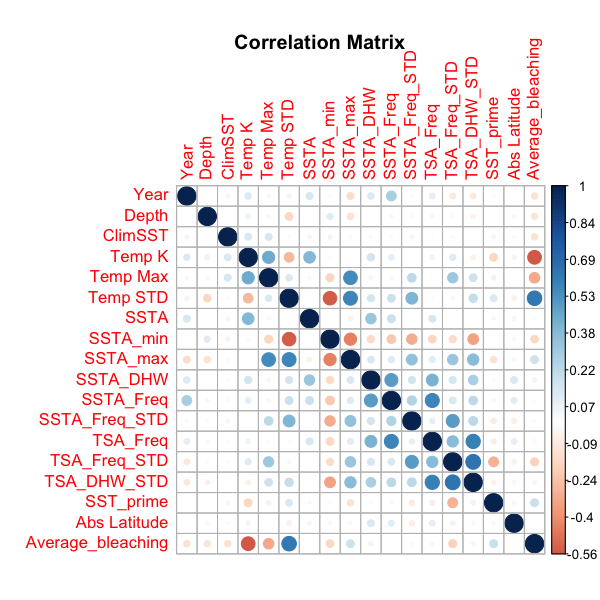

In [12]:
correlation_matrix_filename <- "corr.png"  # define correlation matrix figure filename

png(file=file.path(home_dir, 'figures', correlation_matrix_filename), res=100, width=600, height=600)

correlations <- cor(reg_norm)  # calculate correlations

# shorten labels
labels <- c("Year", "Depth", "ClimSST", "Temp K", "Temp Max", "Temp STD", "SSTA", "SSTA_min", "SSTA_max", "SSTA_DHW", "SSTA_Freq", "SSTA_Freq_STD",  "TSA_Freq", "TSA_Freq_STD", "TSA_DHW_STD", "SST_prime", "Abs Latitude", "Average_bleaching")
colnames(correlations) <- labels
rownames(correlations) <- labels

corrplot(correlations, method="circle", number.cex=0.75, is.corr = FALSE) # plot correlations
title("Correlation Matrix")
dev.off()

display_figure(correlation_matrix_filename)

After normalization, it appears that there are no features that are overly codependent.

#### Generate Model Coefficients ####

In [13]:
multiple_linear_regression <- lm(Average_bleaching ~ ., reg_norm)
summary(multiple_linear_regression)


Call:
lm(formula = Average_bleaching ~ ., data = reg_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2508 -0.3489 -0.1891 -0.0054 11.1240 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -1.475e-16  1.014e-02   0.000 1.000000
Year                                  -3.629e-02  1.103e-02  -3.289 0.001008
Depth                                  1.569e-02  1.043e-02   1.504 0.132524
ClimSST                                2.817e-02  1.042e-02   2.703 0.006885
Temperature_Kelvin                     3.252e-02  1.598e-02   2.036 0.041816
Temperature_Maximum                    5.726e-02  1.599e-02   3.581 0.000345
Temperature_Kelvin_Standard_Deviation -1.580e-01  2.035e-02  -7.767 8.89e-15
SSTA                                  -1.720e-02  1.249e-02  -1.377 0.168418
SSTA_Minimum                          -4.152e-03  1.334e-02  -0.311 0.755616
SSTA_Maximum                           2.791e-02  1.683e-02  

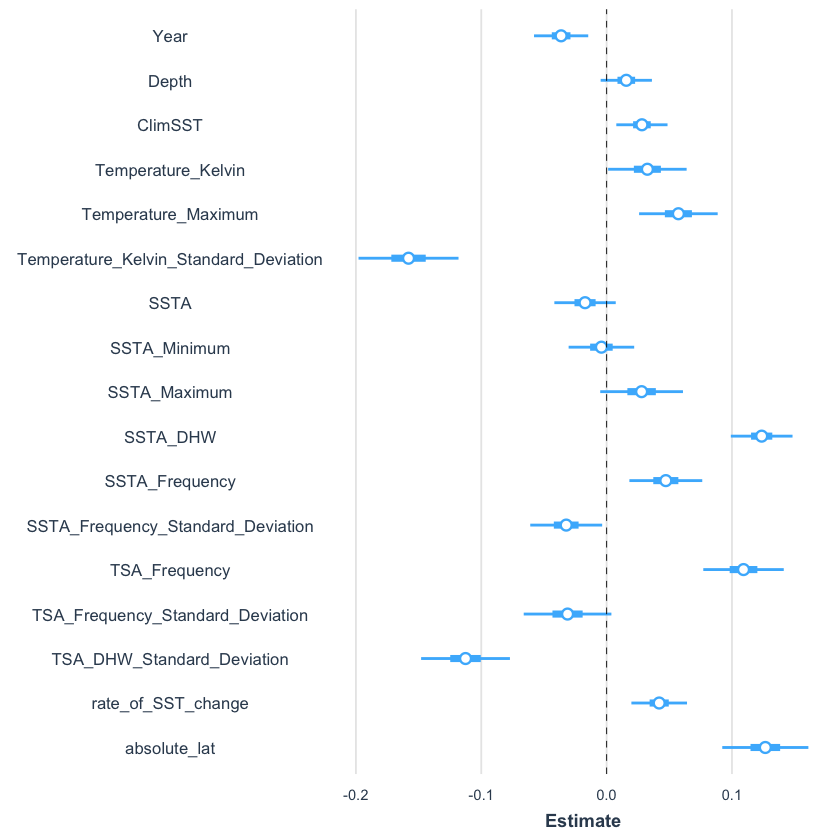

In [14]:
suppressMessages(plot_coefs(multiple_linear_regression, inner_ci_level = .50))

From the coefficient plot above we see that the strongest predictor of coral bleaching, behind absolute latitude, is Sea Surface Temperature Degree Heating Weeks. This is consistent with other studies that have performed similar analyses on coral bleaching [[14]](https://india.mongabay.com/2019/11/towards-better-prediction-of-coral-bleaching/#:~:text=Capturing%20nuances%20of%20coral%20bleaching&text=In%20their%20models%2C%20longitude%20or,responses%20to%20heat%20stress%20immensely.), and makes sense because this metric was designed specifically to predict bleaching events. We also find Thermal Stress Anomalies, Maximum Temperature, SSTA frequency to be important factors in predicting bleaching events. 

We find the standard deviation of SST to be the most negatively correlated feature. This is undoubtedly because warm temperatures cause corals to bleach. We also find TSA standard deviation to be negatively correlated with bleaching events which is likely to be consistent with our analysis of the relationship between SSTA frequency and absolute latitude discussed above. 

## Conclusions ##

In this analysis we have analyzed the trend of coral bleaching events around the world. We have visualized bleaching observations at 3351 sites in 81 countries, and confirmed that, while coral bleaching is a global phenomenon, corals in different regions and sub climates respond in different ways. Specifically, corals at tropical mid-latitude sites between 15 and 20 degrees from the equator are more likely to exhibit severe bleaching events than similar corals at different latitudes. This is most likely due to a number of concomitant mechanisms involving coral species diversity, adaptation, and previous bleaching events.

In terms of temporal analysis, we determined with a general linearized model that the probability a given coral colony will show signs of bleaching has increased marginally from 2002 to 2017. Additionally, with probability density fits of bleaching temperatures before and after 2007, we determined that the temperature threshold at which corals are bleaching is also increasing for reasons that are not well understood. Possible reasons for this trend are, again, past bleaching events or coral adaptation, but future coral bleaching research is needed for a more comprehensive understanding of this phenomenon.

Finally, with a multiple linear regression model, we determined that absolute latitude, Degree Heating Weeks, and the frequency of Thermal Stress Anomalies are the most important features in predicting coral bleaching events. These results are in alignment with previous coral reef bleaching analyses. 

## The Fate of Corals Around the World ##

So, are corals doomed to a future of ever more frequent and intense bleaching events? For the next few decades, the answer is most likely yes, but in the long term it is difficult to say. The climate of the world’s oceans is chaotic, so any prediction we make now will not be meaningful in the centuries ahead. Corals have been around for 160 million years and have likely weathered worse bleaching events in that time frame, but the bleaching events we are observing today are still a big problem because of the effect they have on other coral reef species. Humans depend on those species, so, for our own sake, it is important to understand as much as we can about these bleaching events such that we can better prevent them in the future.